In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
df = pd.read_csv("Datasets/fraudDataset.csv")
df.head()

,Transaction ID,Type,Branch,Amount,Name Origin,Old Balance Origin,New Balance Origin,Name Destination,Old Balance Destination,New Balance Destination,Unusual Logins,Account Age,isFlaggedFraud,Account Type,Date of Transaction,Time of Day,isFraud
0,TRX8345141163,PAYMENT,Indonesia,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,9,5.895247,0,Current,3/1/2018,Morning,0.0
1,TRX3611458944,PAYMENT,India,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,10,2.705920,0,Savings,5/1/2018,Morning,0.0
2,TRX2185116256,TRANSFER,India,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,2,5.710513,0,Current,7/1/2018,Morning,1.0
3,TRX4702784460,CASH_OUT,Australia,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,6.263347,0,Current,6/1/2018,Afternoon,1.0
4,TRX8821326998,PAYMENT,Australia,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,17,4.632230,0,Current,6/1/2018,Morning,0.0


In [3]:
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of rows: 10127
Number of columns: 17


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Transaction ID           10127 non-null  object 
 1   Type                     10123 non-null  object 
 2   Branch                   10127 non-null  object 
 3   Amount                   10125 non-null  float64
 4   Name Origin              10121 non-null  object 
 5   Old Balance Origin       10125 non-null  float64
 6   New Balance Origin       10127 non-null  float64
 7   Name Destination         10121 non-null  object 
 8   Old Balance Destination  10126 non-null  float64
 9   New Balance Destination  10125 non-null  float64
 10  Unusual Logins           10127 non-null  int64  
 11  Account Age              10121 non-null  float64
 12  isFlaggedFraud           10127 non-null  int64  
 13  Account Type             10117 non-null  object 
 14  Date of Transaction   

In [5]:
df.drop(columns=["Transaction ID", "isFlaggedFraud"], inplace=True)

In [6]:
pd.set_option("display.float_format", "{:.2f}".format)

In [7]:
df.describe()

,Amount,Old Balance Origin,New Balance Origin,Old Balance Destination,New Balance Destination,Unusual Logins,Account Age,isFraud
count,10125.00,10125.00,10127.00,10126.00,10125.00,10127.00,10121.00,10125.00
mean,104886.88,883696.53,904470.34,933539.30,1109314.85,10.51,4.52,0.01
std,270636.89,2124553.90,2169946.03,2677976.09,3048644.48,5.81,2.61,0.08
min,2.39,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,4397.38,129.00,0.00,0.00,0.00,6.00,2.25,0.00
50%,12798.31,21363.00,10212.24,0.00,0.00,10.00,4.53,0.00
75%,114381.77,172432.00,170724.01,281934.51,252392.49,16.00,6.80,0.00
max,10000000.00,12900000.00,13000000.00,19500000.00,22600000.00,20.00,9.00,1.00


In [8]:
df.describe(include="object")

,Type,Branch,Name Origin,Name Destination,Account Type,Date of Transaction,Time of Day
count,10123,10127,10121,10121,10117,10120,10125
unique,5,135,10121,6495,2,14,3
top,PAYMENT,Estados Unidos,C1231006815,C985934102,Savings,6/1/2018,Afternoon
freq,5541,1283,1,62,6987,1446,3627


# Removing duplicates

In [9]:
df.drop_duplicates(inplace=True)
print("Number of rows after removing duplicates:", df.shape[0])

Number of rows after removing duplicates: 10127


# Null values

In [10]:
print("Null values in each column:")
df.isna().sum()

Null values in each column:


Type                        4
Branch                      0
Amount                      2
Name Origin                 6
Old Balance Origin          2
New Balance Origin          0
Name Destination            6
Old Balance Destination     1
New Balance Destination     2
Unusual Logins              0
Account Age                 6
Account Type               10
Date of Transaction         7
Time of Day                 2
isFraud                     2
dtype: int64

In [11]:
df.dropna(inplace=True)

In [12]:
print("Null values in each column:")
df.isna().sum()

Null values in each column:


Type                       0
Branch                     0
Amount                     0
Name Origin                0
Old Balance Origin         0
New Balance Origin         0
Name Destination           0
Old Balance Destination    0
New Balance Destination    0
Unusual Logins             0
Account Age                0
Account Type               0
Date of Transaction        0
Time of Day                0
isFraud                    0
dtype: int64

In [13]:
print("Number of rows:", df.shape[0])

Number of rows: 10082


# Unique values

In [14]:
print("Number of unique values in each column:")
df.nunique()

Number of unique values in each column:


Type                           5
Branch                       134
Amount                     10036
Name Origin                10082
Old Balance Origin          7308
New Balance Origin          5918
Name Destination            6474
Old Balance Destination     4143
New Balance Destination     1508
Unusual Logins                21
Account Age                10082
Account Type                   2
Date of Transaction           14
Time of Day                    3
isFraud                        2
dtype: int64

In [15]:
df.drop(columns=["Date of Transaction"], inplace=True)

# Data Visualizations

In [16]:
fraud_count = df["isFraud"].value_counts()
fraud_count

isFraud
0.00    10014
1.00       68
Name: count, dtype: int64

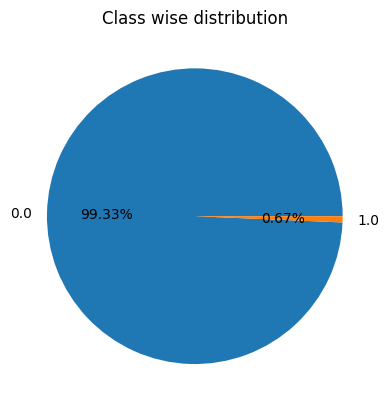

In [17]:
plt.pie(fraud_count, labels=fraud_count.keys(), autopct="%.2f%%")
plt.title("Class wise distribution")
plt.show()

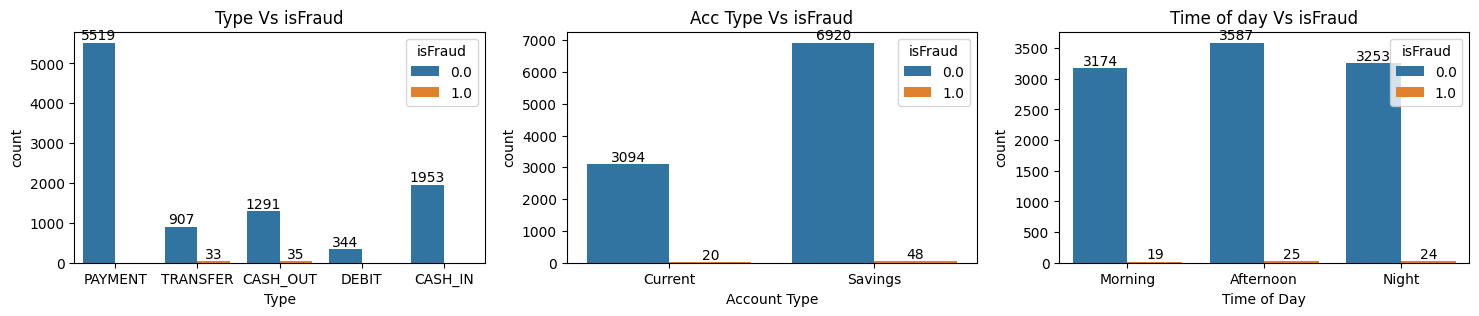

In [18]:
f, axes = plt.subplots(ncols=3, figsize=(18,3))

ax = sns.countplot(data=df, x='Type',hue='isFraud', ax=axes[0])
for i in range(len(ax.containers)):
    ax.bar_label(ax.containers[i], fmt='%.0f')
axes[0].set_title('Type Vs isFraud')

ax = sns.countplot(data=df, x='Account Type',hue='isFraud', ax=axes[1])
for i in range(len(ax.containers)):
    ax.bar_label(ax.containers[i], fmt='%.0f')
axes[1].set_title('Acc Type Vs isFraud')

ax = sns.countplot(data=df, x='Time of Day',hue='isFraud', ax=axes[2])
for i in range(len(ax.containers)):
    ax.bar_label(ax.containers[i], fmt='%.0f')
axes[2].set_title('Time of day Vs isFraud')

plt.show()

Fraudulent transactions are of two types only, i.e., transfer and cash out

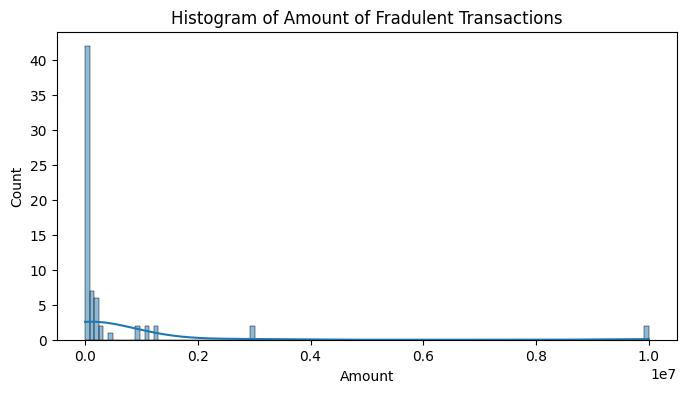

In [20]:
plt.figure(figsize=(8,4))
sns.histplot(data=df[df['isFraud']==1],x='Amount',kde=True)
plt.title('Histogram of Amount of Fradulent Transactions')
plt.show()

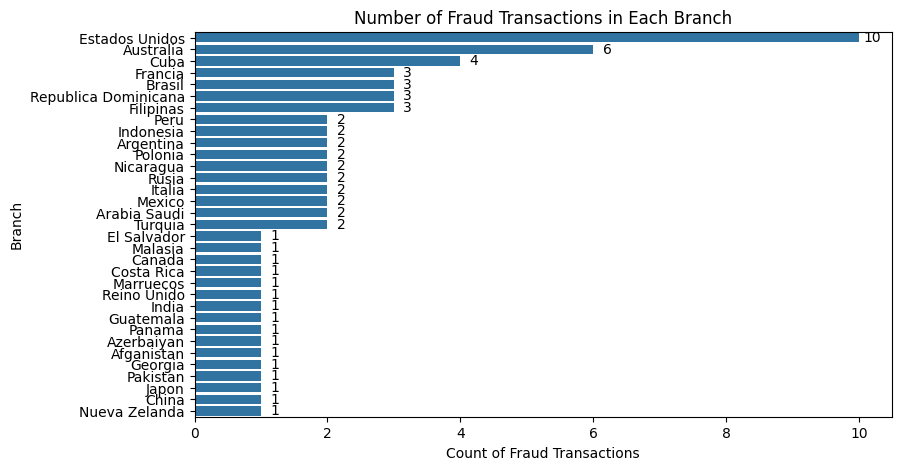

In [21]:
branch_counts = df[df['isFraud'] == 1]['Branch'].value_counts()
sorted_branches = branch_counts.index.tolist()

plt.figure(figsize=(9, 5))
ax = sns.countplot(data=df[df['isFraud'] == 1], y='Branch', orient='horizontal', order=sorted_branches)
plt.title('Number of Fraud Transactions in Each Branch')
plt.xlabel('Count of Fraud Transactions')
plt.ylabel('Branch')

for p in ax.patches:
    ax.annotate(format(p.get_width(), '.0f'),
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='center', va='center',
                xytext=(10, 0),
                textcoords='offset points')

plt.show()

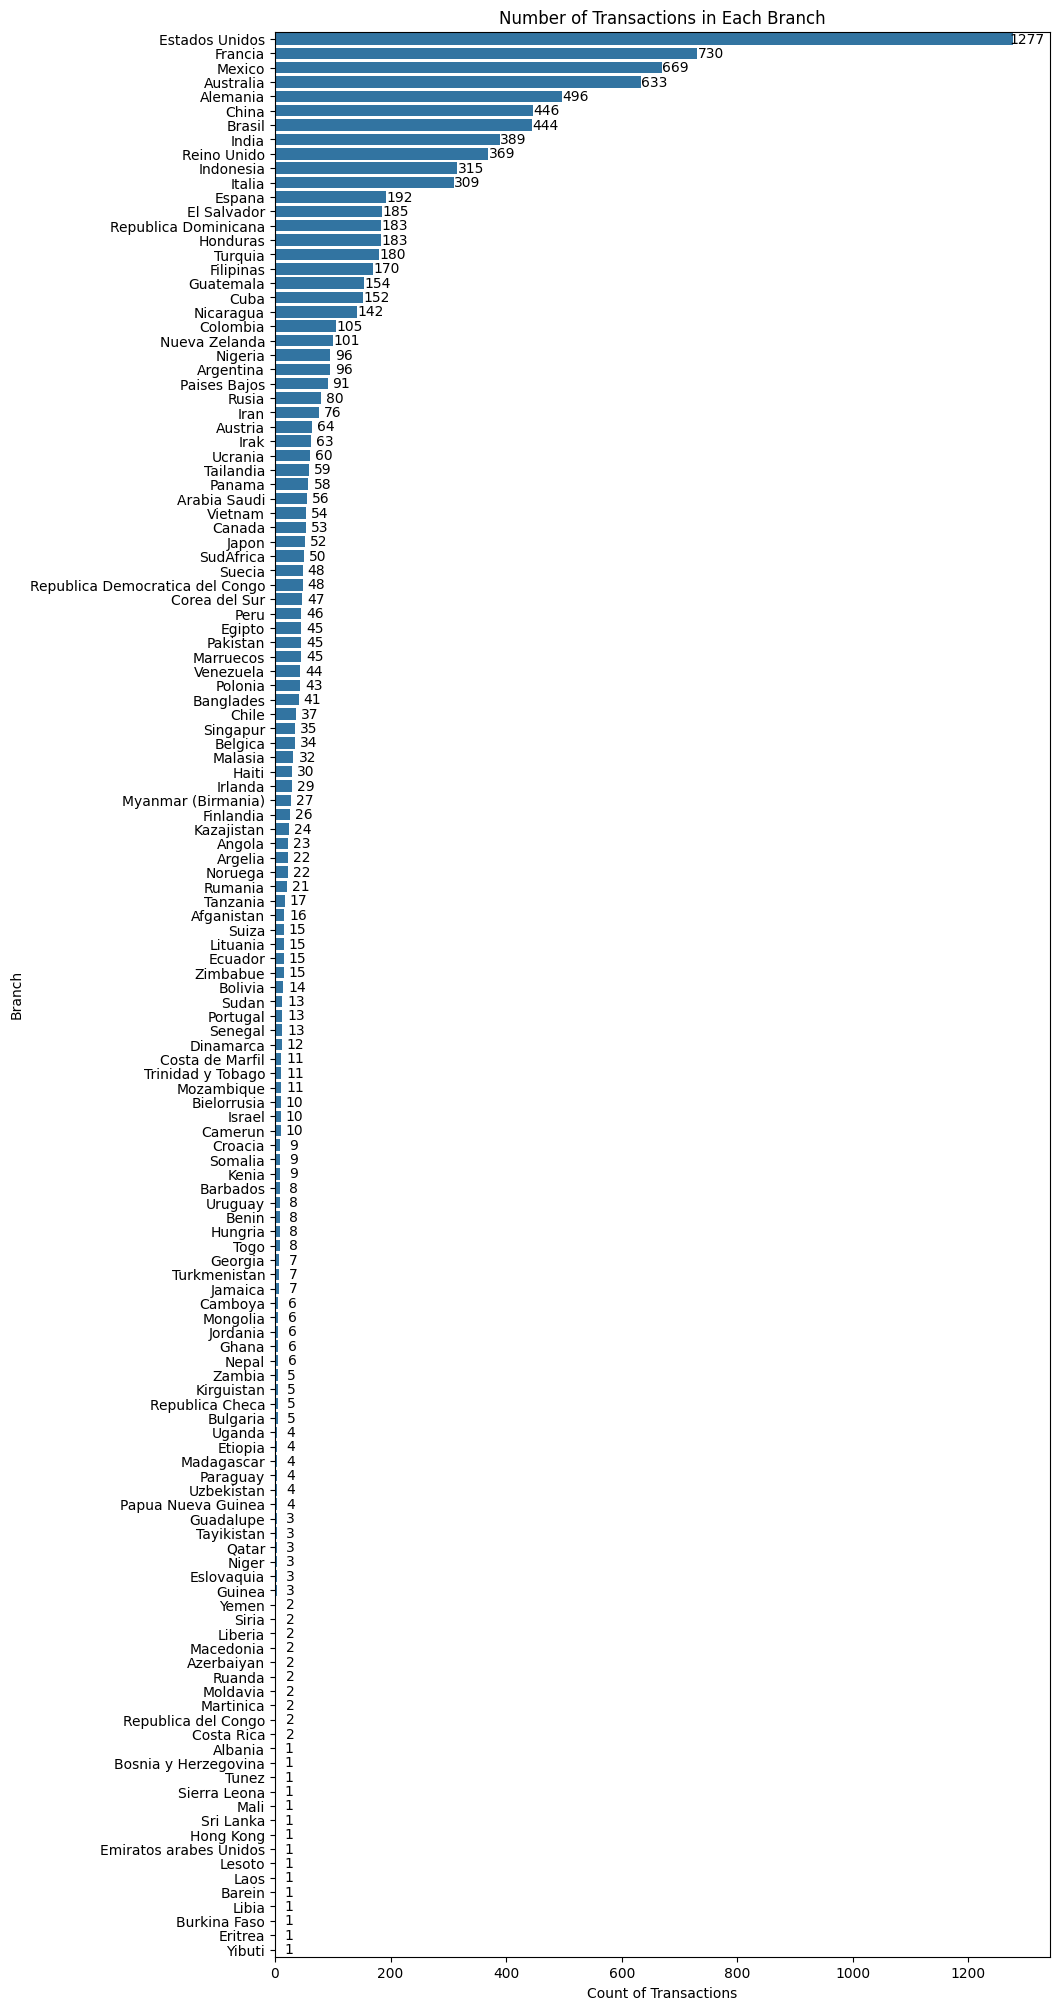

In [22]:
branch_counts = df['Branch'].value_counts()
sorted_branches = branch_counts.index.tolist()
plt.figure(figsize=(10, 25))
ax = sns.countplot(data=df, y='Branch', orient='horizontal', order=sorted_branches)
plt.title('Number of Transactions in Each Branch')
plt.xlabel('Count of Transactions')
plt.ylabel('Branch')

for p in ax.patches:
    ax.annotate(format(p.get_width(), '.0f'),
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='center', va='center',
                xytext=(10, 0),
                textcoords='offset points')

plt.show()

In [23]:
df.to_csv("Datasets/cleaned_data.csv", index=False)